# 機械学習　第８章　実習問題（回帰）

## 問題文に従って各問題ごとにセルを複数追加してプログラムを実装してください。

## ※ 準備作業
### ▶ 以下を実施してください。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/ml_ex_5

/content/drive/MyDrive/ml_ex_5


In [ ]:
# ドライブのマウント
# ディレクトリの作成
# ディレクトリへの移動
# house_rent.csv のアップロード

## ※ matplotlib日本語化のためのライブラリのインストール
### ▶ 以下を実行してください。

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=07c9d47cb4d9bbaad378a164126d9314976ffa6b95d2aca74be4c81bfc8d4e2a
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

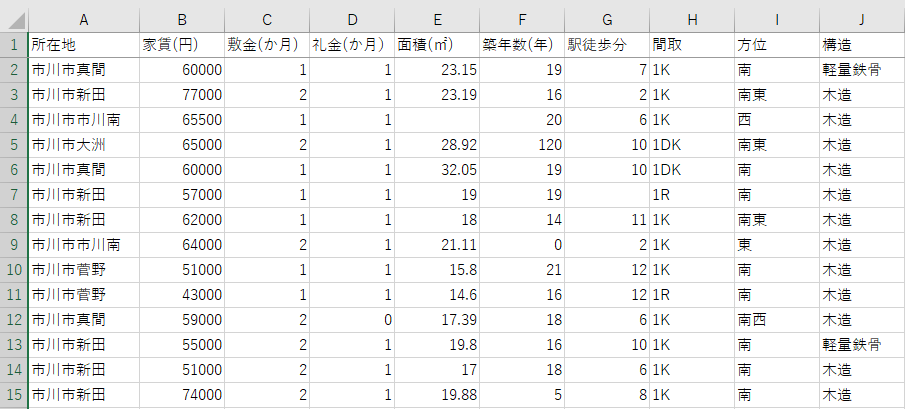

### ■ 正解データ　：　家賃（円）
### ■ 特徴量候補　：　所在地、敷金（か月）、礼金（か月）、面積（㎡）、築年数（年）、駅徒歩、間取、方位、構造

## 問題１　本データのデータ分析において使用する各種ライブラリをインポートしてください。
## また、グラフ表示が同一タブ上に表示されるようにしてください。

In [ ]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 問題２　CSVファイル house_rent.csv を読み込んでください。ただし、エンコーディングは cp932 を使用してください。

In [ ]:
df = pd.read_csv('house_rent.csv',encoding='cp932')
df.head(2)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造


## 問題３　読み込んだCSVファイルの先頭５行と末尾５行を表示してください。

In [ ]:
df.head(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
0,市川市真間,60000,1,1.0,23.15,19.0,7.0,1K,南,軽量鉄骨
1,市川市新田,77000,2,1.0,23.19,16.0,2.0,1K,南東,木造
2,市川市市川南,65500,1,1.0,NaN,20.0,6.0,1K,西,木造
3,市川市大洲,65000,2,1.0,28.92,120.0,10.0,1DK,南東,木造
4,市川市真間,60000,1,1.0,32.05,19.0,10.0,1DK,南,木造


In [ ]:
df.tail(5)

,所在地,家賃(円),敷金(か月),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,間取,方位,構造
299,市川市新田,64000,2,1.0,22.01,NaN,5.0,1R,南,木造
300,市川市新田,52000,1,0.0,18.02,25.0,13.0,1K,南東,軽量鉄骨
301,市川市新田,57000,1,1.0,21.70,20.0,10.0,1K,南,木造
302,市川市真間,60000,1,1.0,20.37,13.0,14.0,1K,西,鉄骨造
303,市川市新田,72000,2,1.0,20.70,0.0,2.0,1K,東,鉄骨造


## 問題４　質的データの列をすべて挙げてください。つぎに、それらの列にデータが何種類あるかを調べて表示してください。

質的データ：文字データや「0，1，2」のように狭い範囲の整数

In [ ]:
df['所在地'].value_counts()

市川市新田     104
市川市市川南     74
市川市真間      42
市川市大洲      30
市川市市川      26
市川市菅野      20
市川市須和田      3
市川市平田       3
市川市大町       1
市川市大和田      1
Name: 所在地, dtype: int64

In [ ]:
df['敷金(か月)'].value_counts()

2    166
1    129
0      9
Name: 敷金(か月), dtype: int64

In [ ]:
df['間取'].value_counts()

1K     229
1R      44
1DK     31
Name: 間取, dtype: int64

In [ ]:
df['方位'].value_counts()

南     167
南東     48
東      30
西      26
南西     26
北東      4
北       3
Name: 方位, dtype: int64

In [ ]:
df['構造'].value_counts()

木造      249
軽量鉄骨     44
鉄骨造      10
Name: 構造, dtype: int64

## 問題５　質的データをすべてダミー化してデータ分析させるデータフレームを作成して下さい。次に、作成したデータフレームの先頭５行を表示してください。

In [ ]:
shozaichi = pd.get_dummies(df['所在地'], drop_first = True)
df2 = pd.concat([df, shozaichi], axis = 1)
df2 = df2.drop(['所在地'], axis = 1)

In [ ]:
shikikin = pd.get_dummies(df['敷金(か月)'], drop_first = True)
df2 = pd.concat([df2, shikikin], axis = 1)
df2 = df2.drop(['敷金(か月)'], axis = 1)

In [ ]:
madori = pd.get_dummies(df2['間取'], drop_first = True)
df2 = pd.concat([df2, madori], axis = 1)
df2 = df2.drop(['間取'], axis = 1)

In [ ]:
houi = pd.get_dummies(df2['方位'], drop_first = True)
df2 = pd.concat([df2, houi], axis = 1)
df2 = df2.drop(['方位'], axis = 1)

In [ ]:
kouzou = pd.get_dummies(df2['構造'], drop_first = True)
df2 = pd.concat([df2, kouzou], axis = 1)
df2 = df2.drop(['構造'], axis = 1)

In [ ]:
df2.head(5)

,家賃(円),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,1,2,1K,1R,北東,南,南東,南西,東,西,軽量鉄骨,鉄骨造
0,60000,1.0,23.15,19.0,7.0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,77000,1.0,23.19,16.0,2.0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
2,65500,1.0,NaN,20.0,6.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,65000,1.0,28.92,120.0,10.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,60000,1.0,32.05,19.0,10.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0


## 問題６　問題５で作成したデータフレームにおいて、訓練データ、検証データ、テストデータに分割してください。
### ただし、訓練データとテストデータの比率は８：２、乱数シードは０とします。(訓練データ＆検証データと自己変換しました。)

In [ ]:
train_val, test = train_test_split(df2,test_size = 0.2, random_state = 0)

## 問題７　訓練データにおいて、欠損値を確認して表示し、平均値で穴埋めしてください。欠損値処理した訓練データの先頭５行を表示してください。

In [ ]:
train_val.isnull().sum()

家賃(円)     0
礼金(か月）    0
面積(㎡)     1
築年数(年)    1
駅徒歩分      1
市川市大洲     0
市川市大町     0
市川市市川     0
市川市市川南    0
市川市平田     0
市川市新田     0
市川市真間     0
市川市菅野     0
市川市須和田    0
1         0
2         0
1K        0
1R        0
北東        0
南         0
南東        0
南西        0
東         0
西         0
軽量鉄骨      0
鉄骨造       0
dtype: int64

In [ ]:
train_val_mean = train_val.mean() # 各列の平均値の計算
train_val2=train_val.fillna(train_val_mean) # 平均値で穴埋め
train_val2.head(5)

,家賃(円),礼金(か月）,面積(㎡),築年数(年),駅徒歩分,市川市大洲,市川市大町,市川市市川,市川市市川南,市川市平田,市川市新田,市川市真間,市川市菅野,市川市須和田,1,2,1K,1R,北東,南,南東,南西,東,西,軽量鉄骨,鉄骨造
176,69000,1.0,19.87,1.0,2.0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
26,70000,2.0,31.53,28.0,8.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
74,65000,1.0,28.92,12.0,10.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
101,51000,1.0,20.50,20.0,2.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
154,72000,1.0,20.70,0.0,2.0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0


## 問題８　外れ値処理をしてください。
### ただし、処理過程を説明できるようにセルを構成してください。

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


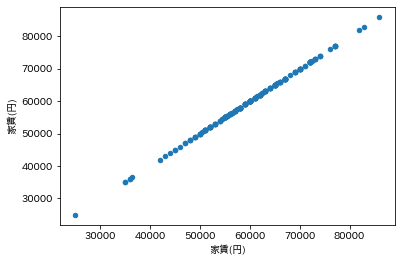

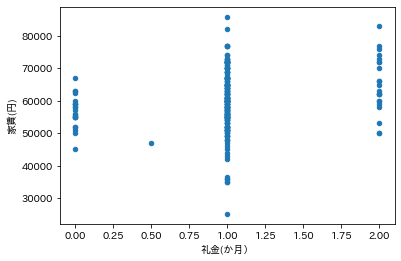

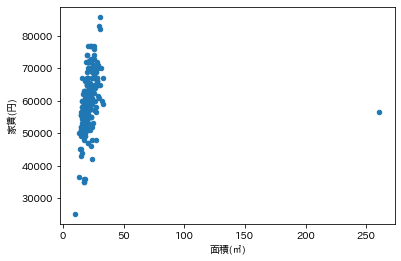

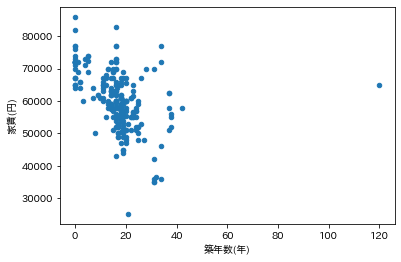

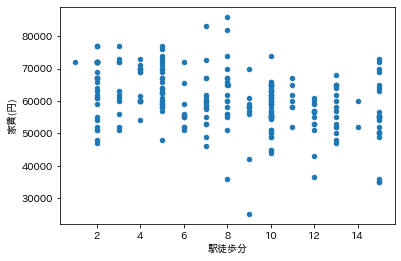

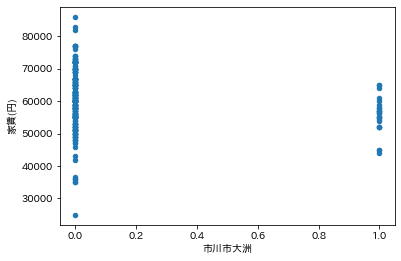

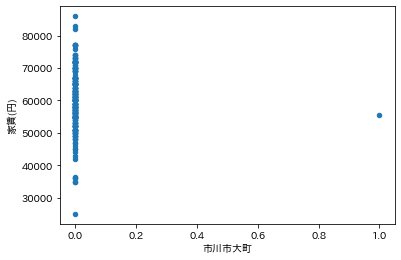

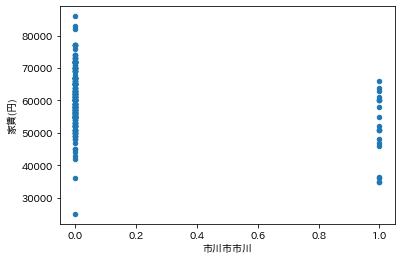

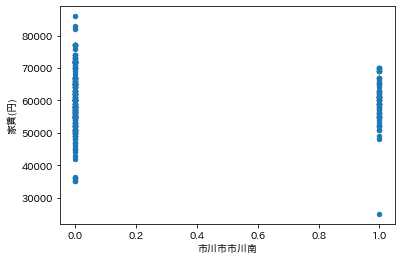

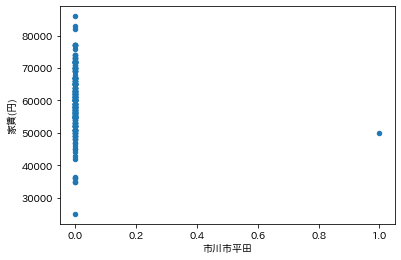

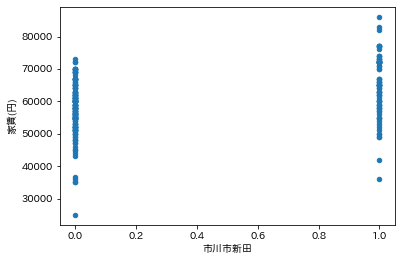

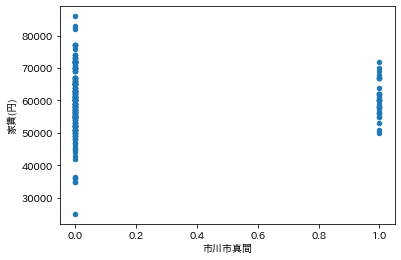

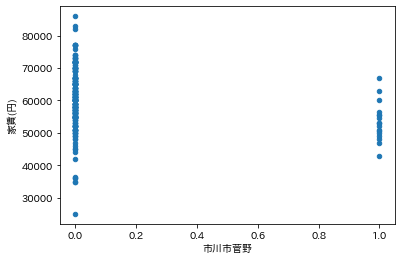

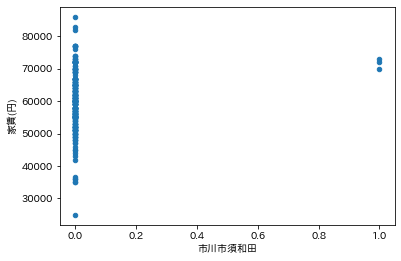

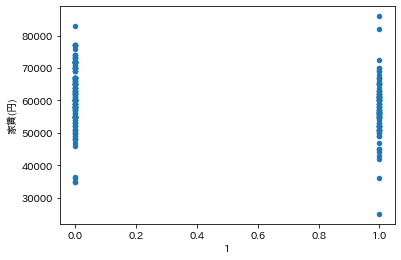

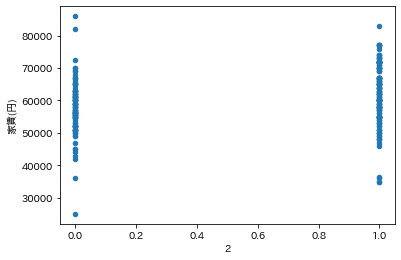

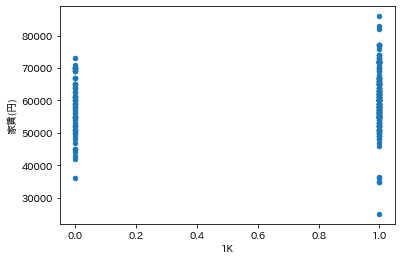

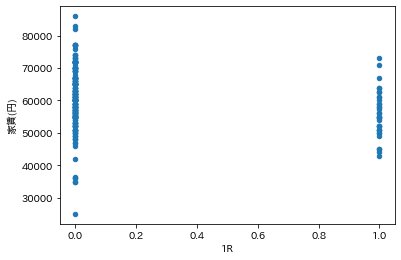

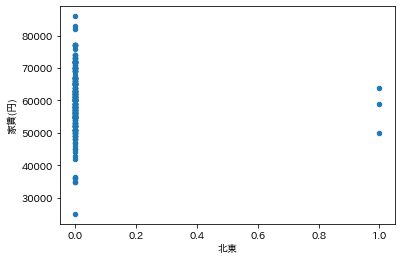

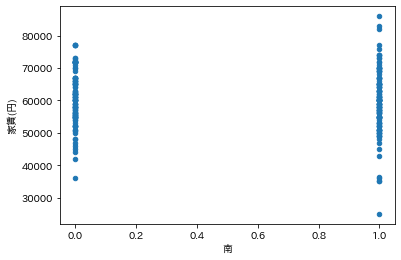

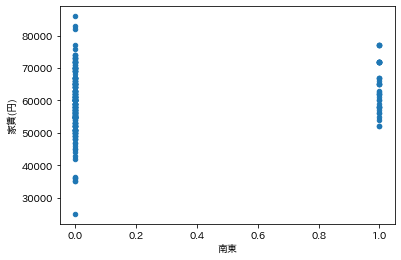

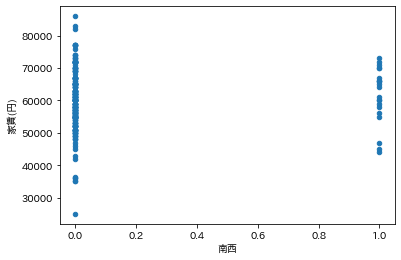

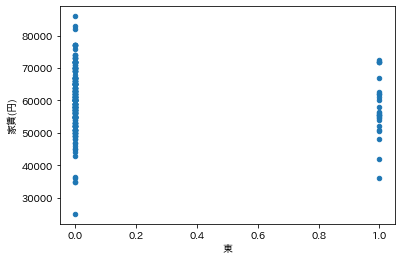

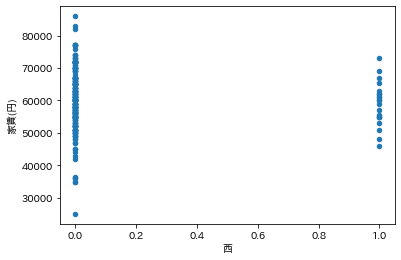

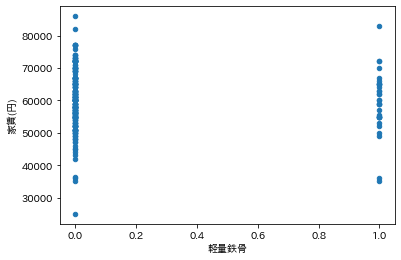

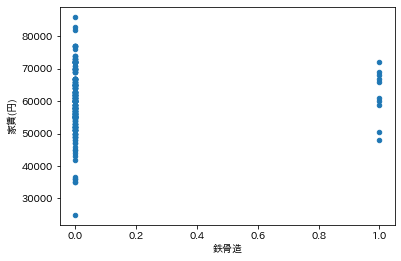

In [ ]:
# 日本語化
import japanize_matplotlib 
colname = train_val2.columns
for name in colname:
    train_val2.plot(kind = 'scatter', x = name, y = '家賃(円)')

In [ ]:
#面積(m2)が250以上、築年数が100年以上

out_line1 = train_val2[(train_val2['面積(㎡)'] >= 250)].index

out_line2 = train_val2[(train_val2['築年数(年)'] > 100)].index

print(out_line1, out_line2)

Int64Index([95], dtype='int64') Int64Index([3], dtype='int64')


In [ ]:
#面積削除
train_val3 = train_val2.drop([95], axis = 0)

In [ ]:
#築年数削除
train_val4 = train_val3.drop([3], axis = 0)

## 問題９　外れ値処理の結果を表示してください。

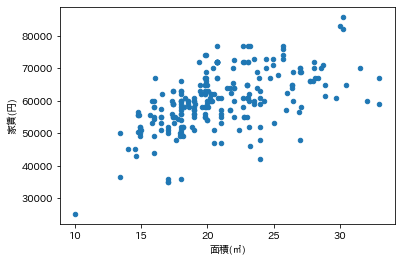

In [ ]:
train_val4.plot(kind = 'scatter', x = '面積(㎡)', y = '家賃(円)')

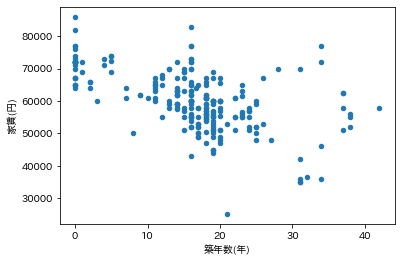

In [ ]:
train_val4.plot(kind = 'scatter', x = '築年数(年)', y = '家賃(円)')

## 問題１０　正解データと各特徴量の相関関係を説明できるように表示してください。

In [ ]:
train_cor = train_val4.corr()['家賃(円)']
train_cor

家賃(円)     1.000000
礼金(か月）    0.207592
面積(㎡)     0.554909
築年数(年)   -0.555607
駅徒歩分     -0.366214
市川市大洲    -0.173506
市川市大町    -0.033703
市川市市川    -0.281801
市川市市川南   -0.037861
市川市平田    -0.073220
市川市新田     0.380378
市川市真間     0.018408
市川市菅野    -0.206971
市川市須和田    0.143410
1        -0.226254
2         0.233202
1K        0.142605
1R       -0.194899
北東       -0.031544
南        -0.074658
南東        0.205735
南西        0.050751
東        -0.093566
西        -0.042591
軽量鉄骨     -0.030630
鉄骨造       0.043055
Name: 家賃(円), dtype: float64

In [ ]:
abs_cor = train_cor.map(abs)
abs_cor

家賃(円)     1.000000
礼金(か月）    0.207592
面積(㎡)     0.554909
築年数(年)    0.555607
駅徒歩分      0.366214
市川市大洲     0.173506
市川市大町     0.033703
市川市市川     0.281801
市川市市川南    0.037861
市川市平田     0.073220
市川市新田     0.380378
市川市真間     0.018408
市川市菅野     0.206971
市川市須和田    0.143410
1         0.226254
2         0.233202
1K        0.142605
1R        0.194899
北東        0.031544
南         0.074658
南東        0.205735
南西        0.050751
東         0.093566
西         0.042591
軽量鉄骨      0.030630
鉄骨造       0.043055
Name: 家賃(円), dtype: float64

In [ ]:
abs_cor.sort_values(ascending = False)

家賃(円)     1.000000
築年数(年)    0.555607
面積(㎡)     0.554909
市川市新田     0.380378
駅徒歩分      0.366214
市川市市川     0.281801
2         0.233202
1         0.226254
礼金(か月）    0.207592
市川市菅野     0.206971
南東        0.205735
1R        0.194899
市川市大洲     0.173506
市川市須和田    0.143410
1K        0.142605
東         0.093566
南         0.074658
市川市平田     0.073220
南西        0.050751
鉄骨造       0.043055
西         0.042591
市川市市川南    0.037861
市川市大町     0.033703
北東        0.031544
軽量鉄骨      0.030630
市川市真間     0.018408
Name: 家賃(円), dtype: float64

## 問題１１　正解データと特徴量を抽出し、それぞれの先頭５行を表示してください。

In [ ]:
col =['築年数(年)', '面積(㎡)','市川市新田','駅徒歩分', '市川市市川', 2,1, '礼金(か月）', '市川市菅野', '南東']
x = train_val4[col]
t = train_val4[['家賃(円)']]

In [ ]:
x.head(5)

,築年数(年),面積(㎡),市川市新田,駅徒歩分,市川市市川,2,1,礼金(か月）,市川市菅野,南東
176,1.0,19.87,0,2.0,0,1,0,1.0,0,0
26,28.0,31.53,1,8.0,0,1,0,2.0,0,0
74,12.0,28.92,0,10.0,0,1,0,1.0,0,1
101,20.0,20.50,0,2.0,1,0,1,1.0,0,0
154,0.0,20.70,1,2.0,0,1,0,1.0,0,0


In [ ]:
t.head(5)

,家賃(円)
176,69000
26,70000
74,65000
101,51000
154,72000


## 問題１２　問題１１で抽出した正解データと特徴量を使用して、訓練データと検証データに分割してください。
### ただし、訓練データと検証データの比率は８：２、乱数シードは０とします。

In [ ]:
#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

## 問題１３　線形重回帰モデルを使用して学習さて、検証データで決定係数を求めて表示してください。

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

# 各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x_train)
sc_x # 表示

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[ 0.00833804, -0.72804351, -0.67419986, ...,  2.42883983,
        -0.28044908, -0.45557345],
       [ 0.00833804, -0.28916014,  1.4832397 , ...,  0.04956816,
        -0.28044908, -0.45557345],
       [ 0.248896  , -0.58174905, -0.67419986, ...,  0.04956816,
        -0.28044908, -0.45557345],
       ...,
       [-1.91612563,  1.14452554,  1.4832397 , ...,  2.42883983,
        -0.28044908, -0.45557345],
       [-0.3524989 ,  1.73214161, -0.67419986, ...,  0.04956816,
        -0.28044908, -0.45557345],
       [ 2.65447557,  0.52521234, -0.67419986, ..., -2.32970351,
        -0.28044908,  2.19503572]])

In [ ]:
# array 型だと見づらいのでデータフレームに変換
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)
# 平均値の計算
tmp_df.mean()

築年数(年)   -8.095376e-17
面積(㎡)    -5.267777e-16
市川市新田     1.676899e-16
駅徒歩分     -4.163336e-17
市川市市川    -1.329955e-17
2         1.156482e-18
1         2.046974e-16
礼金(か月）    9.945748e-17
市川市菅野    -9.078386e-17
南東       -2.775558e-17
dtype: float64

In [ ]:
tmp_df.std() # 標準偏差の計算

築年数(年)    1.002614
面積(㎡)     1.002614
市川市新田     1.002614
駅徒歩分      1.002614
市川市市川     1.002614
2         1.002614
1         1.002614
礼金(か月）    1.002614
市川市菅野     1.002614
南東        1.002614
dtype: float64

In [ ]:
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

In [ ]:
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

In [ ]:
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
# 標準化した検証データで決定係数を計算
model.score(sc_x_val, sc_y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.5793887354765959

## 問題１４　問題１３で学習したモデルを使用して以下のデータを使用して家賃がいくらになるか予測させてください。
### 予測させるデータは以下の通りです。
#### 敷金：１か月
#### 礼金；１か月
#### 面積：３０㎡
#### 築年数：３年
#### 駅徒歩分：１０分
#### 所在地：市川市新田
#### 間取：１DK
#### 方位：南向き
#### 構造：鉄骨造


In [ ]:
sc_model_x2 = sc_model_x.inverse_transform(sc_x)
sc_model_y2 = sc_model_y.inverse_transform(sc_y)
model2 = LinearRegression()
model2.fit(sc_model_x2, sc_model_y2)
new = [[3, 30, 1, 10, 0,0, 1, 1, 0, 0]]
model2.predict(new)

array([[74911.57026705]])

## 問題１５　特徴量エンジニアリングで訓練データと検証データの決定係数が特徴量エンジニアリングを行う前より良くなるようにしてください。
### ただし、特徴量エンジニアリングの過程が理解できるようにセルを構成してください。

## 問題１６　チューニング結果を受けて、データの標準化後再学習をしてください。

## 問題１７　テストデータを使用してモデルを評価してください。
## ただし、決定係数の値が 0.65 以上となるようにしてください。

## 問題１８　モデルとStandardScalerオブジェクトを保存してください。
### ただし、モデルは house_rent.pkl、StandardScalerオブジェクトは house_rent_scx と house_rent_scy とします。